# HClustering, Kmeans and DBSCAN for Airlines Data

# HClustering Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
Data = pd.read_csv("EastWestAirlines.CSV.csv")
Data   

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [2]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [3]:
import warnings
warnings.filterwarnings('ignore')
df_norm = norm_func(Data.iloc[:,1:])
df_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

In [4]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Data.iloc[:,1:]))
data   

0    1     2    3    4         5         6         7         8   \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

            9    10  
0     0.843742  0.0  
1     0.839884  0.0  
2     0.847842  0.0  
3     0.837955  0.0  
4     0.835905  1.0  
...        ...  ...  
3994  0.168917  1.0  
3995  0.167953  1.0  
3996  0.168797  1.0  
3997  0.168676  0.0  
3998  0.168314  0.0  

[3999 rows x 11 columns]

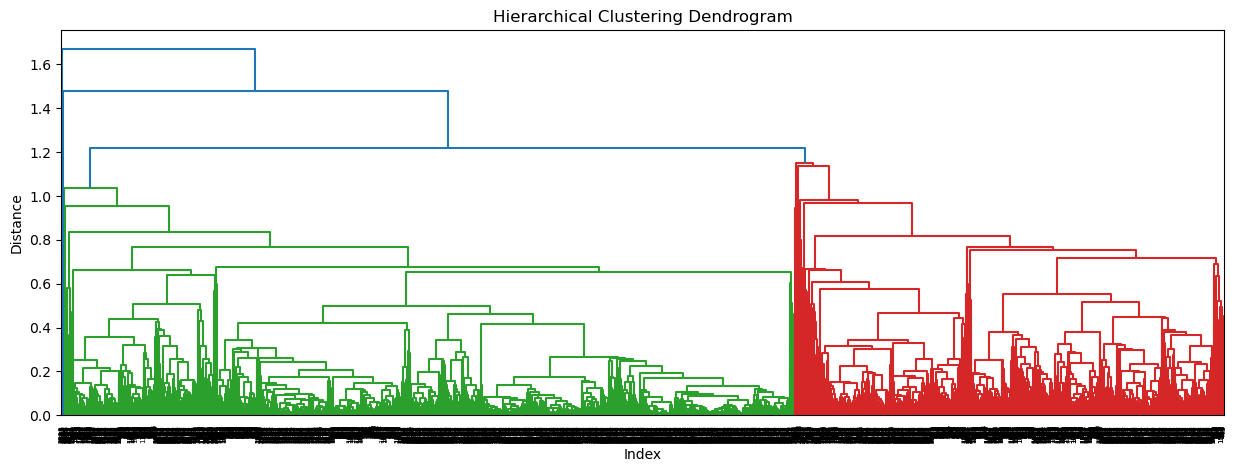

In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [6]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Data['clust']=cluster_labels # creating a  new column and assigning it to new column 
Data  

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      1  
3998       0      1  

[3999 rows x 13 columns]

In [8]:
Data.iloc[:,1:].groupby(Data.clust).mean()   

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                              
0      9.597426e+04  240.572888   2.656676   1.015668   1.000681   
1      5.980784e+04   87.602462   1.705322   1.013900   1.008737   
2      1.704838e+06    0.000000   1.000000   1.000000   1.000000   
3      1.319995e+05  347.000000   2.500000   1.000000   1.000000   
4      7.656512e+04  147.750000   3.875000   1.000000   4.250000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                   
0       28342.702997    15.547003         804.152589         2.461853   
1       10227.689039     9.142971         226.292295         0.652502   
2       17108.000000    32.000000        4823.000000        23.000000   
3       65634.250000    69.250000       19960.000000        49.250000   
4      115273.250000    30.250000         600.000000         2.000000   

       Days_since_enroll  Award?  clust  
clust                                    
0            4627.118529     1.0    0.0  
1            3820.652105     0.0    1.0  
2            7283.000000     1.0    2.0  
3            2200.250000     1.0    3.0  
4            5127.875000     1.0    4.0

In [9]:
data = Data[(Data.clust==1)]
data   

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3991  4014    39142           0          3          1          1        14981   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3991           28                  0                0               1408   
3992           12                  0                0               1407   
3993            3                  0                0               1397   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
5          0      1  
...      ...    ...  
3991       0      1  
3992       0      1  
3993       0      1  
3997       0      1  
3998       0      1  

[2518 rows x 13 columns]

In [10]:
data = Data[(Data.clust==0)]
data    

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
11      12    96522           0          5          1          1        61105   
...    ...      ...         ...        ...        ...        ...          ...   
3987  4010    11933           0          1          1          1          249   
3989  4012     2622           0          1          1          1         1625   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26               2077                4               6935   
7               4                250                1               6938   
8              43               3850               12               6948   
9              28               1150                3               6931   
11             19                  0                0               6924   
...           ...                ...              ...                ...   
3987            3                 79                1               1412   
3989            6                  0                0               1404   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   

      Award?  clust  
4          1      0  
7          1      0  
8          1      0  
9          1      0  
11         1      0  
...      ...    ...  
3987       1      0  
3989       1      0  
3994       1      0  
3995       1      0  
3996       1      0  

[1468 rows x 13 columns]

In [11]:
data = Data[(Data.clust==3)]
data  

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
2015  2032    53232         888          4          1          1        80696   
3235  3257   287033           0          1          1          1        26161   
3583  3606   160114         500          1          1          1        71954   
3594  3617    27619           0          4          1          1        83726   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
2015           65              22100               45               3831   
3235           58              12873               53               2272   
3583           86              30817               53               1373   
3594           68              14050               46               1325   

      Award?  clust  
2015       1      3  
3235       1      3  
3583       1      3  
3594       1      3

In [12]:
data = Data[(Data.clust==2)]
data    

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
275  279  1704838           0          1          1          1        17108   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
275           32               4823               23               7283   

     Award?  clust  
275       1      2

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_subset = pd.DataFrame(scaler.fit_transform(Data.iloc[:,1:7]))
Data_subset 

0         1         2         3         4         5
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121
...        ...       ...       ...       ...       ...       ...
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992

[3999 rows x 6 columns]

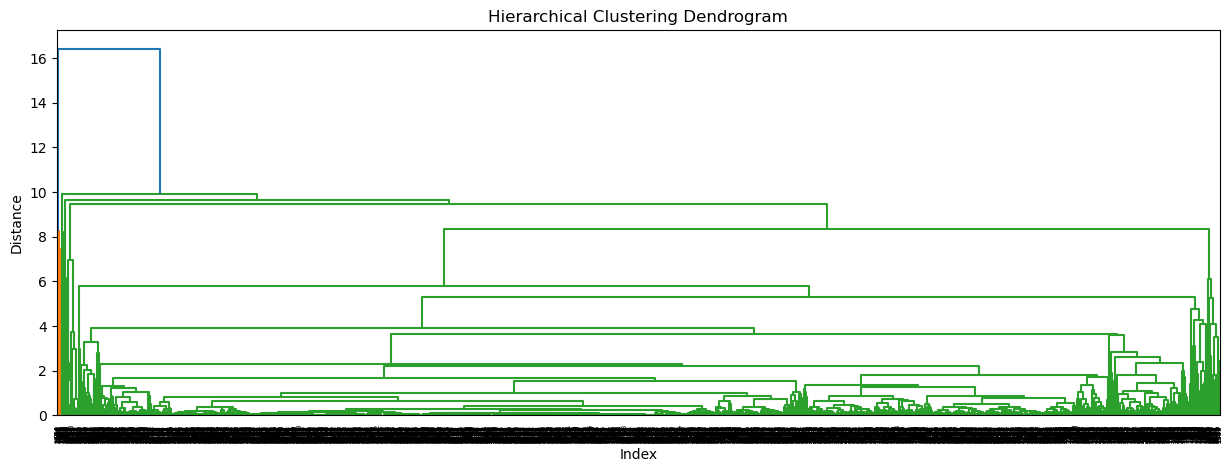

In [14]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Data_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [15]:
Data.iloc[:,1:].groupby(Data.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                              
0      9.597426e+04  240.572888   2.656676   1.015668   1.000681   
1      5.980784e+04   87.602462   1.705322   1.013900   1.008737   
2      1.704838e+06    0.000000   1.000000   1.000000   1.000000   
3      1.319995e+05  347.000000   2.500000   1.000000   1.000000   
4      7.656512e+04  147.750000   3.875000   1.000000   4.250000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                   
0       28342.702997    15.547003         804.152589         2.461853   
1       10227.689039     9.142971         226.292295         0.652502   
2       17108.000000    32.000000        4823.000000        23.000000   
3       65634.250000    69.250000       19960.000000        49.250000   
4      115273.250000    30.250000         600.000000         2.000000   

       Days_since_enroll  Award?  clust  
clust                                    
0            4627.118529     1.0    0.0  
1            3820.652105     0.0    1.0  
2            7283.000000     1.0    2.0  
3            2200.250000     1.0    3.0  
4            5127.875000     1.0    4.0

In [16]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(Data_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Data['clust']=cluster_labels # creating a  new column and assigning it to new column 
Data  

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [17]:
data = Data[(Data.clust==0)]
data  

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      0  
3998       0      0  

[3923 rows x 13 columns]

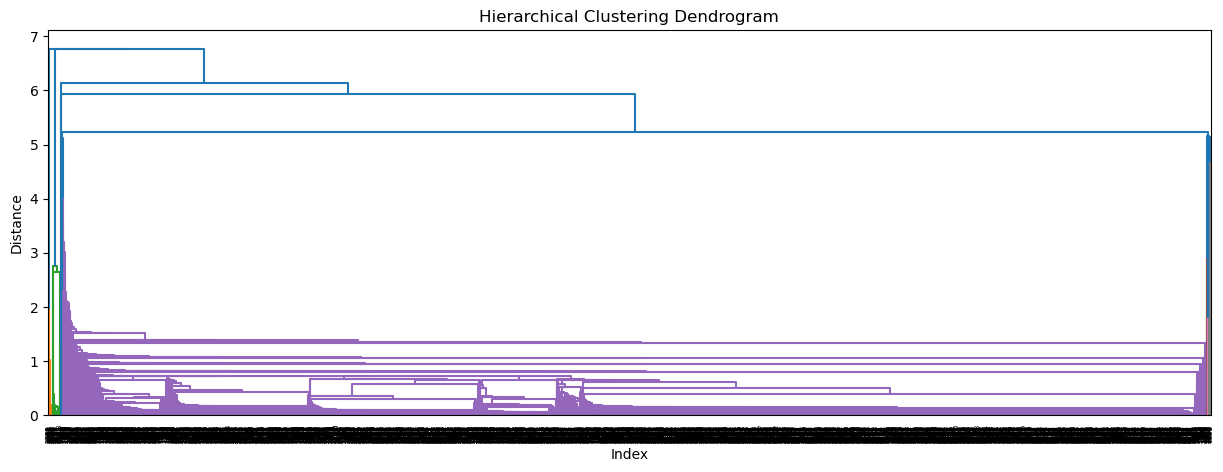

In [18]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Data_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [19]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(Data_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Data['clust']=cluster_labels # creating a  new column and assigning it to new column 
Data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [20]:
data = Data[(Data.clust==2)]
data  

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
226    230   117329           0          1          2          1         6448   
392    398    11189           0          1          2          1         9044   
561    568   380930           0          2          2          1        22485   
794    804    55610           0          1          2          1         5095   
1149  1161    84856           0          1          2          1         6894   
1383  1397    18154           0          1          2          1         7748   
1389  1403    49145           0          1          2          1        12755   
1527  1542    23965           0          1          2          1         7308   
1541  1556    36887           0          1          2          1         9048   
1976  1993    11961           0          1          2          1        11961   
2006  2023   101901           0          1          2          1        17898   
2317  2335    10458           0          1          2          1        10458   
2421  2440    41062           0          1          2          1         8275   
2557  2576    42966           0          1          2          1         7734   
2674  2694    59704           0          4          2          1        57404   
2741  2763    42970           0          1          2          1         7889   
2906  2928    17769           0          1          2          1         5165   
2967  2989     8210           0          1          2          1         9122   
3155  3177    21736           0          1          2          1         6672   
3191  3213    56624           0          1          2          1        12311   
3359  3382    20318           0          1          2          1         6990   
3487  3510    38292           0          1          2          1        12487   
3762  3785    74531           0          1          2          1        10914   
3788  3811   374613           0          1          2          1        23592   
3837  3860     8150           0          1          2          1        14135   
3851  3874    11947           0          1          2          1         8099   
3959  3982    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
226            11                  0                0               7416   
392            20                  0                0               8296   
561            25                213                1               6539   
794            13                  0                0               6151   
1149           13                  0                0               5547   
1383           16                  0                0               5310   
1389           22               2450                7               5323   
1527           16                550                3               5003   
1541           11                  0                0               4951   
1976           10                  0                0               4646   
2006           22                100                1               4433   
2317           12                  0                0               3726   
2421           11                  0                0               3356   
2557            6                  0                0               2840   
2674           14                  0                0               2440   
2741           14                  0                0               2256   
2906           10                  0                0               1807   
2967           16                  0                0               3312   
3155           10                  0                0               2544   
3191           14                  0                0        

# KMeans Clustering

In [21]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [22]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X 

array([2.62580563e-01, 4.39374867e-01, 2.04416985e-01, 8.69688679e-01,
       8.57135678e-01, 7.38109356e-01, 8.94284142e-01, 6.47764975e-01,
       4.69769676e-01, 1.97518053e-02, 5.35447091e-01, 1.97918612e-01,
       3.39084696e-01, 7.40422751e-01, 1.16192931e-01, 4.06083258e-01,
       4.42117413e-01, 7.31237951e-01, 3.75805194e-01, 4.55489030e-01,
       4.63810744e-01, 7.91054145e-01, 2.27522652e-01, 8.99916010e-01,
       8.77064909e-01, 3.92084447e-01, 1.49407754e-01, 5.00077090e-01,
       8.20817628e-01, 1.22777581e-02, 1.10782905e-01, 5.58875827e-03,
       2.20571884e-01, 5.01537576e-01, 2.35295673e-01, 3.11391745e-02,
       3.08983749e-01, 2.47904751e-01, 2.19033740e-01, 8.22402529e-01,
       5.36499215e-02, 4.54503041e-01, 6.41033557e-01, 4.41302235e-01,
       2.75325764e-01, 2.74379141e-01, 6.57200751e-01, 8.59789272e-03,
       1.63575922e-01, 2.92379042e-01, 8.16180820e-01, 2.71280277e-01,
       1.14845933e-01, 1.81847582e-01, 6.24943217e-01, 4.57268131e-01,
      

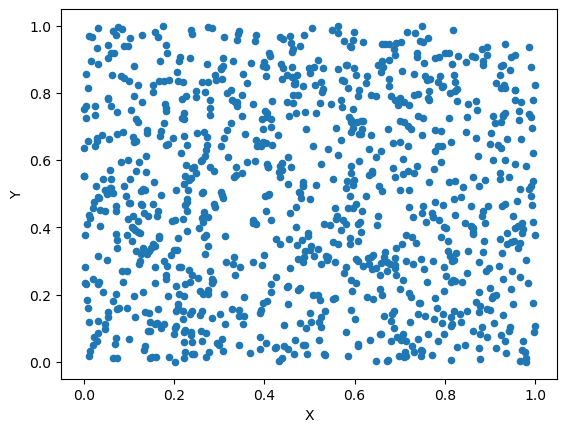

In [23]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)


<AxesSubplot:xlabel='X', ylabel='Y'>

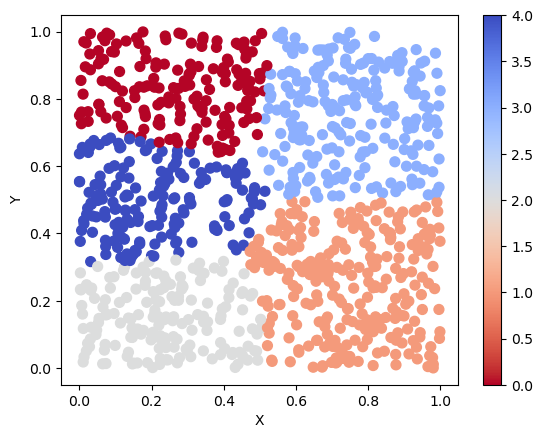

In [24]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

In [25]:
Data = pd.read_csv("EastWestAirlines.CSV.csv")
Data 

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [26]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [27]:
df_norm = norm_func(Data.iloc[:,1:])  

In [28]:
df_norm.head(10)  # Top 10 rows
 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   
5  0.009631         0.0       0.00        0.0        0.0     0.000000   
6  0.049808         0.0       0.50        0.0        0.0     0.104223   
7  0.012233         0.0       0.00        0.0        0.0     0.019910   
8  0.259850         0.0       0.50        0.5        0.0     0.006648   
9  0.061507         0.0       0.50        0.0        0.0     0.107803   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0     0.011628           0.000000         0.000000           0.843742     0.0  
1     0.023256           0.000000         0.000000           0.839884     0.0  
2     0.046512           0.000000         0.000000           0.847842     0.0  
3     0.011628           0.000000         0.000000           0.837955     0.0  
4     0.302326           0.067398         0.075472           0.835905     1.0  
5     0.000000           0.000000         0.000000           0.836749     0.0  
6     0.290698           0.000000         0.000000           0.843019     0.0  
7     0.046512           0.008112         0.018868           0.836267     1.0  
8     0.500000           0.124931         0.226415           0.837473     1.0  
9     0.325581           0.037317         0.056604           0.835423     1.0

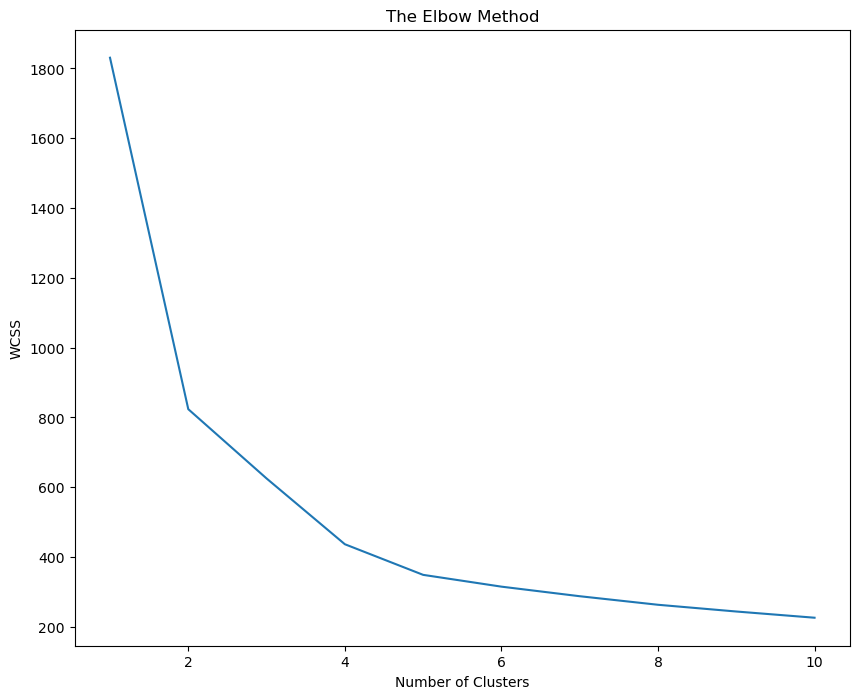

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [30]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [31]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([0, 0, 0, ..., 2, 4, 4])

In [32]:
y_kmeans 

array([0, 0, 0, ..., 2, 4, 4])

In [33]:
clf.cluster_centers_ 

array([[ 2.92977490e-02,  8.07381776e-03,  3.05651672e-02,
         9.80392157e-03,  2.88350634e-04,  1.31422452e-02,
         8.03358279e-02,  7.92145051e-03,  1.37537812e-02,
         6.71326724e-01, -4.99600361e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -2.77555756e-16],
       [ 1.94103660e-02,  8.43565288e-03,  1.76669894e-02,
         8.22846079e-03,  1.69409487e-03,  1.23106384e-02,
  

In [34]:
clf.inertia_

348.9434283901318

In [35]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Data['clust']=md # creating a  new column and assigning it to new column 
Data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      2  
...      ...    ...  
3994       1      1  
3995       1      1  
3996       1      2  
3997       0      4  
3998       0      4  

[3999 rows x 13 columns]

In [36]:
Data.iloc[:,1:7].groupby(Data.clust).mean() 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0       49921.633641   89.903226   1.122120   1.019585   1.001152   
1       83529.153046  290.453195   1.156018   1.032689   1.008915   
2      108317.387376  198.336634   3.915842   1.001238   1.025990   
3      118297.325243   73.467638   3.584142   1.001618   1.022654   
4       33097.301357   94.131783   1.070736   1.016473   1.006783   

        Bonus_miles  
clust                
0       3467.074885  
1       8850.395245  
2      45609.657178  
3      31384.393204  
4       3244.520349

In [37]:
plt.style.use(['classic']) 
print(plt.style.available)   

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

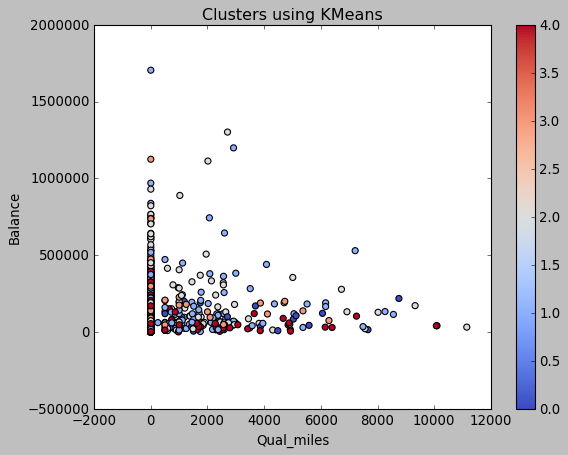

In [38]:
Data.plot(x="Qual_miles",y ="Balance",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [39]:
WCSS 

[1830.7932128584112,
 823.6756984125205,
 625.1693121408771,
 436.7088576193262,
 348.94332172541374,
 315.1510643117449,
 287.73076207313125,
 263.2132188914898,
 243.91820123818718,
 226.1081378152495]

# DBSCAN Model

In [40]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [41]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("EastWestAirlines.CSV.csv");

print(df.head())
df  

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [42]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [43]:
stscaler = StandardScaler().fit(Data)
X = stscaler.transform(Data) 
X   

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.38855365e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.38855365e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.38855365e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.58318399e-02],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.29688997e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.29688997e+00]])

In [44]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)                      

DBSCAN(eps=0.475)

In [45]:
#Noisy samples are given the label -1.
dbscan.labels_          

array([ 0,  0,  0, ..., -1, 23, 23], dtype=int64)

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [47]:
cl
pd.set_option("display.max_rows", None)  

In [48]:
cl

cluster
0           0
1           0
2           0
3           0
4          -1
5           0
6          -1
7           1
8          -1
9          -1
10         -1
11         -1
12         10
13          0
14          0
15         -1
16         -1
17          1
18          5
19         -1
20         -1
21         -1
22         -1
23          0
24         -1
25          0
26         -1
27          0
28         -1
29         -1
30         -1
31          0
32         -1
33          0
34          0
35         -1
36         -1
37         -1
38         -1
39          4
40          0
41         -1
42         -1
43         -1
44          8
45         -1
46         -1
47          1
48         -1
49         -1
50         -1
51          0
52         -1
53         -1
54          0
55          0
56          2
57         -1
58         -1
59         -1
60          6
61         -1
62          0
63         -1
64          0
65         -1
66          0
67          2
68         -1
69          3
70         -1
71         -1
72         -1
73         -1
74         -1
75          8
76          0
77         -1
78         -1
79         -1
80         -1
81         -1
82          0
83          0
84          0
85         -1
86          1
87         -1
88         -1
89          1
90         -1
91         -1
92         -1
93         -1
94         -1
95          0
96         -1
97          2
98          0
99         -1
100        -1
101         4
102         0
103        -1
104         0
105        -1
106        -1
107         4
108        -1
109        -1
110        -1
111        -1
112        -1
113        -1
114        -1
115        -1
116        -1
117        -1
118         5
119         1
120         0
121        -1
122        -1
123         3
124        -1
125        -1
126        -1
127        -1
128         7
129        -1
130         4
131         1
132        -1
133        -1
134         5
135        -1
136         2
137        -1
138        -1
139         0
140         0
141         0
142         0
143         2
144         6
145        -1
146         0
147        -1
148         6
149         0
150        -1
151        -1
152        -1
153         0
154        -1
155        -1
156        -1
157         3
158        -1
159         0
160         6
161        -1
162        -1
163        -1
164         3
165         0
166         0
167        -1
168        -1
169        -1
170        -1
171         0
172        -1
173        -1
174        -1
175        -1
176        -1
177        -1
178         4
179        -1
180        -1
181        -1
182         0
183         7
184         6
185         6
186        -1
187        -1
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         4
195        -1
196        -1
197         8
198        -1
199        -1
200        -1
201        -1
202         0
203        -1
204         0
205         0
206        -1
207        -1
208         3
209         0
210        -1
211         0
212        -1
213         3
214        -1
215        -1
216         0
217         0
218        -1
219         9
220        -1
221        -1
222        -1
223         0
224        -1
225        -1
226        -1
227        -1
228        -1
229        -1
230         5
231        -1
232         0
233         7
234         7
235        -1
236         0
237        -1
238        -1
239         0
240        -1
241         7
242        -1
243        -1
244        -1
245        -1
246        -1
247        -1
248        -1
249        -1
250         0
251        -1
252        -1
253         3
254        -1
255        -1
256        -1
257        -1
258        -1
259        -1
260        -1
261         0
262        -1
263        -1
264        -1
265         5
266         0
267         0
268        -1
269        -1
270         5
271        -1
272        -1
273        -1
274         0
275        -1
276         0
277        -1
278         0
279        -1
280        -1
281        -1
282        -1
283        -1
284        -1
28

In [49]:
df1 = pd.concat([df,cl],axis=1)  
df1     

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [50]:
import matplotlib.pyplot as plt
plt.style.use('classic')   

Text(0.5, 1.0, 'Clusters using DBScan')

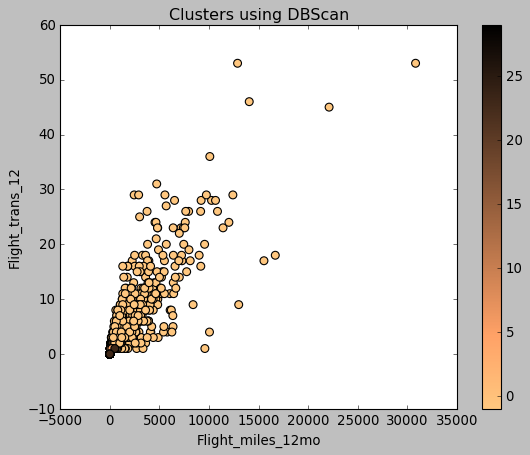

In [51]:
df1.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')      

In [52]:
dl = dbscan.labels_   

In [53]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)   

-0.20461137961801412

In [54]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [55]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [56]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0            1
1            1
2            1
3            1
4            0
5            1
6            0
7            1
8            0
9            0
10           1
11           0
12           1
13           1
14           1
15           0
16           0
17           1
18           0
19           1
20           0
21           0
22           1
23           1
24           1
25           1
26           1
27           1
28           0
29           1
30           0
31           1
32           0
33           1
34           1
35           0
36           1
37           1
38           0
39           1
40           1
41           0
42           0
43           0
44           0
45           0
46           1
47           1
48           0
49           1
50           1
51           1
52           0
53           1
54           1
55           1
56           0
57           1
58           0
59           0
60           0
61           1
62           1
63           1
64           1
65           0
66           1
67           0
68           0
69           0
70           1
71           0
72           0
73           1
74           0
75           0
76           1
77           0
78           0
79           0
80           1
81           1
82           1
83           1
84           1
85           0
86           1
87           0
88           1
89           1
90           1
91           1
92           0
93           1
94           0
95           1
96           1
97           0
98           1
99           0
100          0
101          1
102          1
103          1
104          1
105          0
106          0
107          1
108          0
109          0
110          0
111          1
112          0
113          1
114          1
115          0
116          1
117          0
118          0
119          1
120          1
121          0
122          0
123          0
124          0
125          0
126          0
127          0
128          1
129          0
130          1
131          1
132          1
133          1
134          0
135          0
136          0
137          0
138          1
139          1
140          1
141          1
142          1
143          0
144          0
145          1
146          1
147          0
148          0
149          1
150          0
151          0
152          0
153          1
154          0
155          0
156          0
157          1
158          0
159          1
160          0
161          0
162          1
163          0
164          0
165          1
166          1
167          0
168          0
169          0
170          0
171          1
172          0
173          1
174          0
175          0
176          1
177          1
178          1
179          1
180          1
181          0
182          1
183          1
184          0
185          1
186          0
187          1
188          0
189          1
190          0
191          0
192          0
193          1
194          1
195          1
196          0
197          0
198          1
199          0
200          0
201          0
202          1
203          0
204          1
205          1
206          0
207          1
208          0
209          1
210          0
211          1
212          1
213          0
214          1
215          0
216          1
217          1
218          0
219          0
220          0
221          0
222          1
223          1
224          0
225          1
226          1
227          0
228          1
229          0
230          0
231          0
232          1
233          1
234          1
235          0
236          1
237          1
238          0
239          1
240          0
241          1
242          0
243          0
244          0
245          0
246          1
247          1
248          0
249          1
250          1
251          1
252          0
253          0
254          1
255          0
256          1
257          1
258          1
259          0
260          1
261          1
262          1
263          1
264          1
265          0
2

In [57]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

Text(0.5, 1.0, 'Clusters using KMeans')

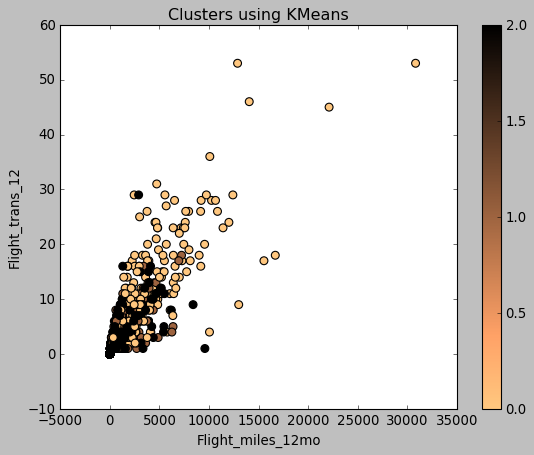

In [58]:
df2.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [59]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.2713955636059365

In [60]:
from sklearn.neighbors import NearestNeighbors  

In [61]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

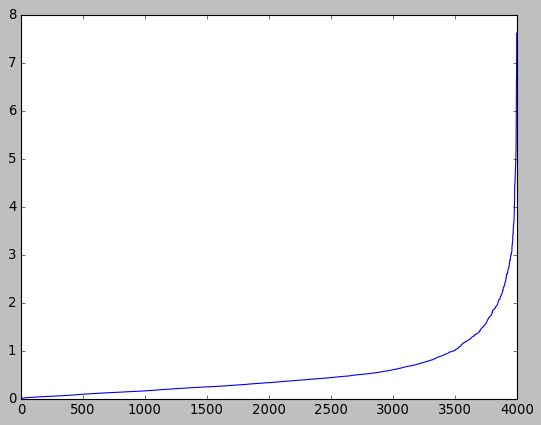

In [62]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  